# Paths

La longitud de un camindo entre dos vertices de un grafo es la cantidad de ejes que hay que atravesar. <br> 
Distancia: La distancia entre dos vertices es la longitud del camino mas corto entre ellos 

#### Breadth First Search
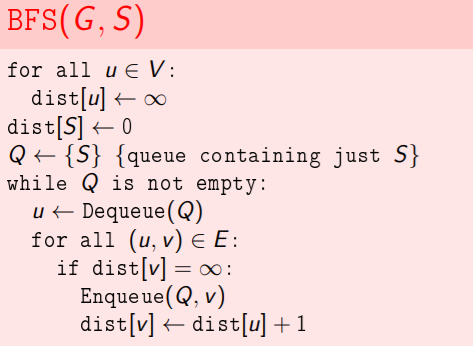


En el codigo primero le asignamos una distancia de infinito a todos los puntos. <br> 
Luego, S es el punto inicial y le asignamos una distancia de 0 y vamos a ir creando un Queue. <br>
Mientras haya elementos en el queue, sacamos un elemento y le llamamos u. Luego, para todas las conecciones de u, si la distancia de la conecci'on v es infinita (no lo hemos visitado), lo agregamos a la queue. Y le asignamos una distancia de dist[u]+1. <br>
Tiene un Running time de O(|E|+|V|) <br><br>

Lema de correctness: Para el momento en el que el nodo u a distancia d de S ha sido dequeue, todos los nodos a distancia menor o igual a d han sido descubiertos. <br>
Con ello se puede probar que el algoritmo da las distancias correctas. <br><br>

##### Shortest Path Tree

Dado un grafo y un nodo inicial S, podemos convertirlo en un tree en el que los eleemntos a distancia i de S est'an en el nivel i. Adem'as, se puede mostrar que efectivamente es un tree porque no tiene ciclos.
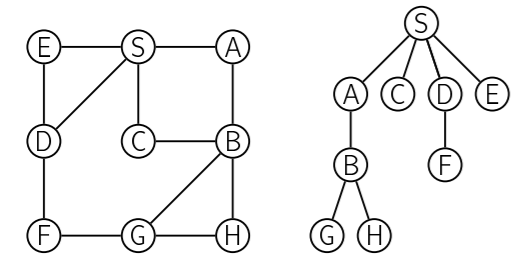

##### Algoritmo para construir el arbol de minima distancia:
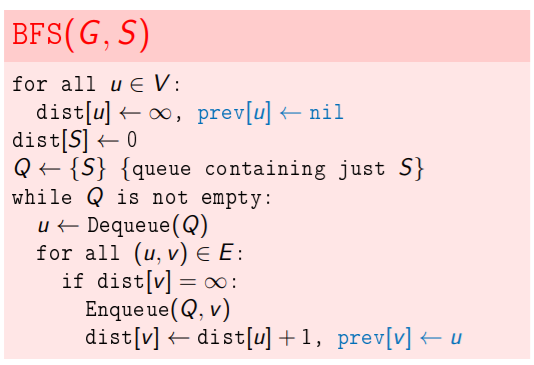 
Basicamente es lo mismo pero ponemos de donde vino cada elemento, eso nos sirve para

###### Reconstruir el camino:
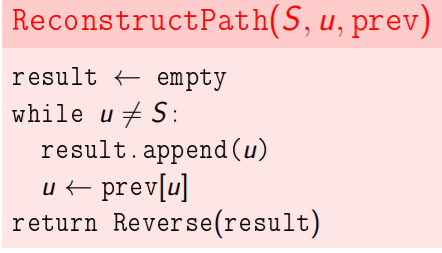

#### 1. Minimum path

In [8]:
''' Dado un grafo bidireccional. y dos vectores v, u , entontrar el numero de pasos
para viajar de v a u. '''
#Notas en minimum path. py
from collections import deque

# ceamos una clase que contiene los nodos
# en el atributo conex se ponene todas las conexiones del nodo
# en ind el indice del nodo y en dist la distancia desde v
# en prev se pone el indice del nodo anterior en el camino que sale de v. 
class nodos:
    def __init__(self, ind, conex):
        self.conex = conex
        self.ind = ind
        self.dist = -1
        self.prev = -1


n , m = [int(x) for x in input().split()]

# creamos los vertices sin conexiones
vertices = [nodos(i,[]) for i in range(n)]

#les damos las conexiones bidireccionales
for i in range(m):
    p , q = [int(x) for x in input().split()]
    vertices[p-1].conex.append(q-1)
    vertices[q-1].conex.append(p-1)


# tomamos el indice del principio y del fin
princ , fin = [int(x) for x in input().split()]
princ = princ - 1
fin = fin -1

#algoritmo principal, toma un grafo y un principio y asigna todas las distancias
def BFS(vertices, princ):
    #el pricipio tiene distancia 0
    vertices[princ].dist = 0
    #ponemos el principio en el queue
    Q = deque([vertices[princ].ind])

    #mientras haya elementos en el queue
    while len(Q) > 0:
        #vamos sacando los elementos del queue
        v = Q.popleft()

        #para todas las conexiones a v (el ultimo elemento en sacar del queue)
        for u in vertices[v].conex:
            # si no les hemos asignado distancia, los apendamos al queue para visitarlos luego
            if vertices[u].dist == -1:
                Q.append(u)
                # y le asignamos una distancia 1 mayor
                # ademas de especificar de donde vinieron
                vertices[u].dist = vertices[v].dist + 1
                vertices[u].prev = v

            #Si tocamos el punto final, paramos todo (no hace falta medir la
            #distancia a los demas. 
            if u == fin:
                return(vertices[u].dist)



#Aplicamos BFS
BFS(vertices, princ)

#si nunca se llego a fin en BFS, entonces la distancia a fin va a ser -1
print(vertices[fin].dist)




4 4
1 2
4 1
2 3
3 1
2 4
2


#### 2. Checar si un grafo bidirijido es bipartito

In [10]:
''' Checar si una grafica bidirected es bipartita.'''
'''Una graf es bipartita si se puede colorear de dos colores (cada eje une colores distitnos)
Es una graf simple (pero no necesariamente totalmente conectado)'''

from collections import deque

#Los colores sean 0 y 1
class nodos:
    #le asignamos atributo de color a los ejes
    def __init__(self, ind, conex):
        self.conex = conex
        self.ind = ind
        self.color = -1

#todo esto es igual que siempre
n , m = [int(x) for x in input().split()]

vertices = [nodos(i,[]) for i in range(n)]

for i in range(m):
    p , q = [int(x) for x in input().split()]
    vertices[p-1].conex.append(q-1)
    vertices[q-1].conex.append(p-1)


    
#Empezamos a colorear desde el 0 
def BFS(vertices, princ):
    #empezamos en el principio 
    vertices[princ].color = 0
    
    #lo ponemos en un queue
    Q = deque([vertices[princ].ind])
    
    #mientras haya cosas en el queue
    while len(Q) > 0:
        #las vamos sacando
        v = Q.popleft()

        #vemos todas sus conexiones
        for u in vertices[v].conex:
            #si la conexion directa u de v esta coloreada del mismo colo, ya valio
            if vertices[u].color == vertices[v].color:
                #0 significa que no se puede.
                return(0)
            
            #sino,
            elif vertices[u].color == -1:
                #lo poenmos en el queue
                Q.append(u)
                #Si no est\'a pintado, lo pintamos del color inverso a v.
                #Le asignamos el color inverso
                vertices[u].color = (vertices[v].color + 1) % 2
                
    #Si ya acabo sin problemas:
    return(1)

#Checa todo pasa por todos los vertices por si el grafo no est'a totalmente conectado
# es como un DFS
def checatodo(vertices):
    for w in vertices:
        #Si no lo he chacado
        if w.color == -1:
            #Lo checamos y si da que hay un error (0) ya decimos que es un error sin checar otras ramas
            if BFS(vertices, w.ind) == 0:
                return(0)
    return(1)




print(checatodo(vertices))


5 4
5 2
4 2
3 4
1 4
1
